# Airbnb NYC 2019 EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 20)

## Load Data

In [2]:
data_path = Path("Lab14/AB_NYC_2019.csv")
df = pd.read_csv(data_path)
shape_info = df.shape
df_head = df.head()
print(shape_info)
df_head

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Clean Data

In [3]:
df["last_review"] = pd.to_datetime(df["last_review"])
median_review_date = df["last_review"].dropna().median()
df["last_review"] = df["last_review"].fillna(median_review_date)
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["name"] = df["name"].fillna("Unknown Listing")
df["host_name"] = df["host_name"].fillna("Unknown Host")
df = df[df["price"] > 0]
upper_price = df["price"].quantile(0.99)
df = df[df["price"] <= upper_price]
upper_nights = df["minimum_nights"].quantile(0.99)
df = df[df["minimum_nights"] <= upper_nights]
df = df.reset_index(drop=True)
missing_summary = df.isna().sum()
print(df.shape)
missing_summary

(47928, 16)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Feature Engineering

In [4]:
analysis_date = pd.Timestamp("2019-12-31")
df["days_since_last_review"] = (analysis_date - df["last_review"]).dt.days
df["minimum_booking_revenue"] = df["price"] * df["minimum_nights"]
df["availability_ratio"] = df["availability_365"] / 365
df["price_per_review"] = df["price"] / (df["number_of_reviews"] + 1)
engineered_preview = df[["price","minimum_booking_revenue","availability_ratio","days_since_last_review","price_per_review"]].describe()
engineered_preview

,price,minimum_booking_revenue,availability_ratio,days_since_last_review,price_per_review
count,47928.000000,47928.000000,47928.000000,47928.000000,47928.000000
mean,137.653209,833.777187,0.305438,405.841053,48.842459
std,103.927713,1717.415976,0.358948,379.606961,82.285165
min,10.000000,10.000000,0.000000,176.000000,0.074603
25%,69.000000,132.000000,0.000000,195.000000,4.051451
50%,105.000000,300.000000,0.117808,226.000000,16.666667
75%,175.000000,680.000000,0.608219,422.000000,55.000000
max,799.000000,23250.000000,1.000000,3200.000000,799.000000


## Overview Metrics

In [5]:
summary = df[["price","minimum_nights","number_of_reviews","availability_365","minimum_booking_revenue","availability_ratio","days_since_last_review"]].describe().T
summary

,count,mean,std,min,25%,50%,75%,max
price,47928.0,137.653209,103.927713,10.0,69.0,105.000000,175.000000,799.0
minimum_nights,47928.0,5.709126,8.383021,1.0,1.0,2.000000,5.000000,40.0
number_of_reviews,47928.0,23.545568,44.809209,0.0,1.0,5.000000,24.000000,629.0
availability_365,47928.0,111.484915,131.016075,0.0,0.0,43.000000,222.000000,365.0
minimum_booking_revenue,47928.0,833.777187,1717.415976,10.0,132.0,300.000000,680.000000,23250.0
availability_ratio,47928.0,0.305438,0.358948,0.0,0.0,0.117808,0.608219,1.0
days_since_last_review,47928.0,405.841053,379.606961,176.0,195.0,226.000000,422.000000,3200.0


## Comparison

/tmp/ipykernel_191595/2215262498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_price.values, y=group_price.index, palette="crest")
/tmp/ipykernel_191595/2215262498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=availability_group.values, y=availability_group.index, palette="mako")


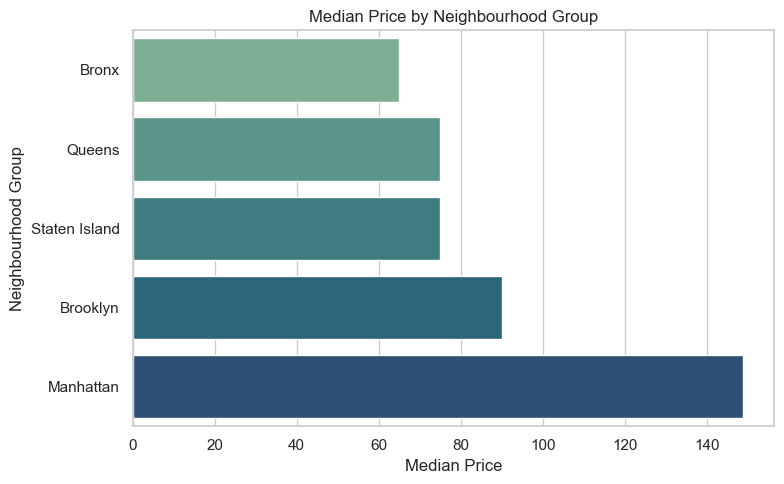

<Figure size 800x500 with 0 Axes>

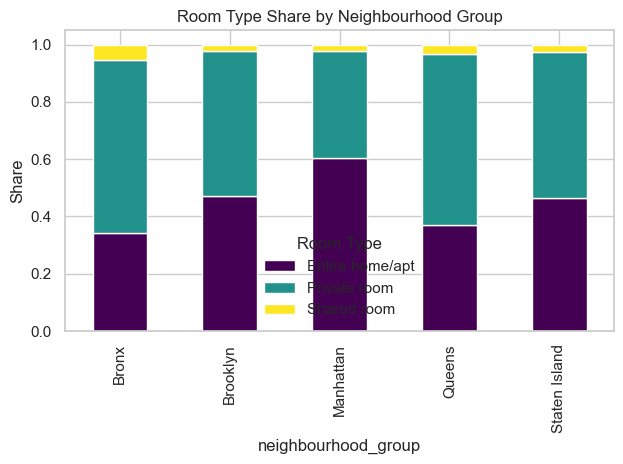

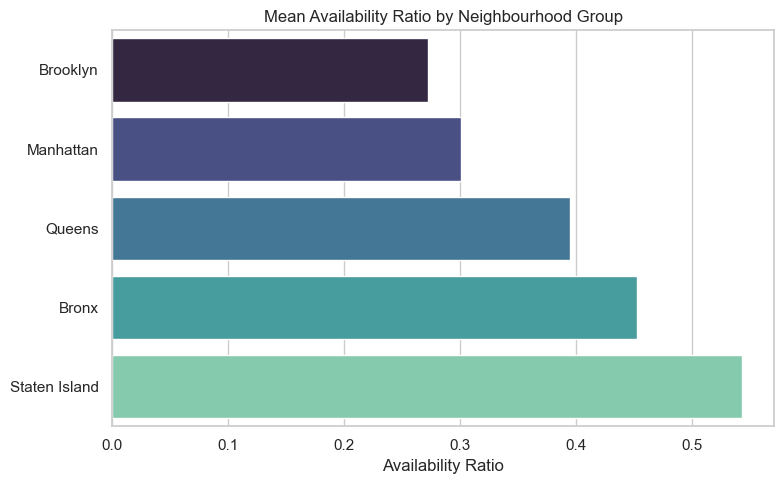

In [6]:
group_price = df.groupby("neighbourhood_group")["price"].median().sort_values()
room_counts = df.groupby(["neighbourhood_group","room_type"]).size().unstack(fill_value=0)
room_share = room_counts.div(room_counts.sum(axis=1), axis=0)
availability_group = df.groupby("neighbourhood_group")["availability_ratio"].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=group_price.values, y=group_price.index, palette="crest")
plt.title("Median Price by Neighbourhood Group")
plt.xlabel("Median Price")
plt.ylabel("Neighbourhood Group")
plt.tight_layout()
plt.figure(figsize=(8,5))
room_share.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Room Type Share by Neighbourhood Group")
plt.ylabel("Share")
plt.legend(title="Room Type")
plt.tight_layout()
plt.figure(figsize=(8,5))
sns.barplot(x=availability_group.values, y=availability_group.index, palette="mako")
plt.title("Mean Availability Ratio by Neighbourhood Group")
plt.xlabel("Availability Ratio")
plt.ylabel("")
plt.tight_layout()

## Trend

/tmp/ipykernel_191595/2490188802.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df.set_index("last_review").resample("M")["number_of_reviews"].sum().sort_index()
/tmp/ipykernel_191595/2490188802.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df.set_index("last_review").resample("M")["price"].median().sort_index()
/tmp/ipykernel_191595/2490188802.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_availability = df.set_index("last_review").resample("M")["availability_ratio"].mean().sort_index()


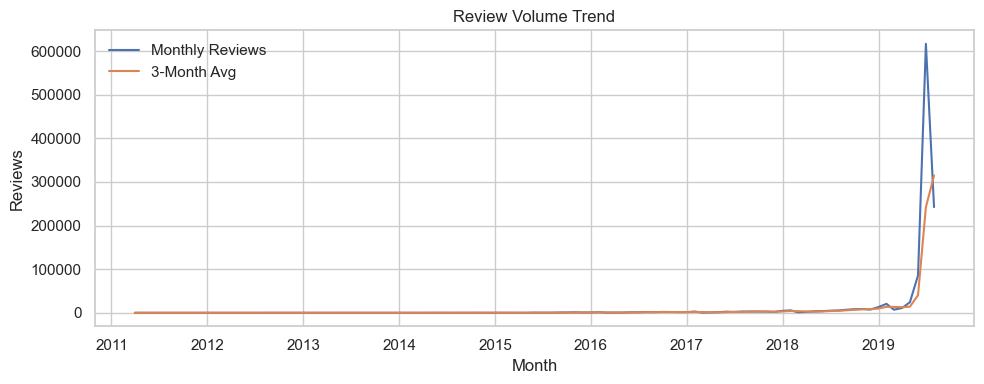

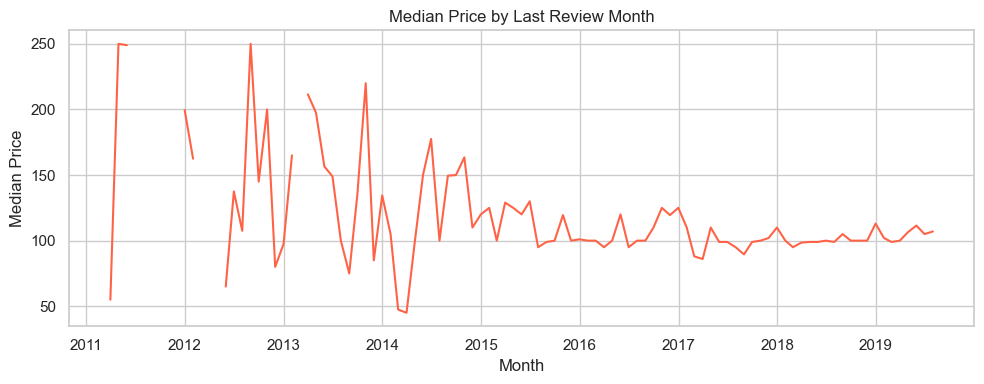

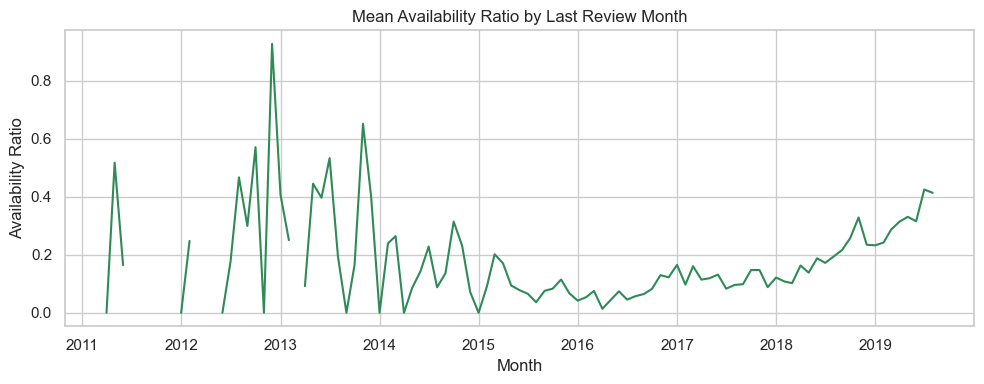

In [7]:
monthly_reviews = df.set_index("last_review").resample("M")["number_of_reviews"].sum().sort_index()
rolling_reviews = monthly_reviews.rolling(3, min_periods=1).mean()
monthly_price = df.set_index("last_review").resample("M")["price"].median().sort_index()
monthly_availability = df.set_index("last_review").resample("M")["availability_ratio"].mean().sort_index()
plt.figure(figsize=(10,4))
plt.plot(monthly_reviews.index, monthly_reviews.values, label="Monthly Reviews")
plt.plot(rolling_reviews.index, rolling_reviews.values, label="3-Month Avg")
plt.title("Review Volume Trend")
plt.xlabel("Month")
plt.ylabel("Reviews")
plt.legend()
plt.tight_layout()
plt.figure(figsize=(10,4))
plt.plot(monthly_price.index, monthly_price.values, color="tomato")
plt.title("Median Price by Last Review Month")
plt.xlabel("Month")
plt.ylabel("Median Price")
plt.tight_layout()
plt.figure(figsize=(10,4))
plt.plot(monthly_availability.index, monthly_availability.values, color="seagreen")
plt.title("Mean Availability Ratio by Last Review Month")
plt.xlabel("Month")
plt.ylabel("Availability Ratio")
plt.tight_layout()

## Relationship

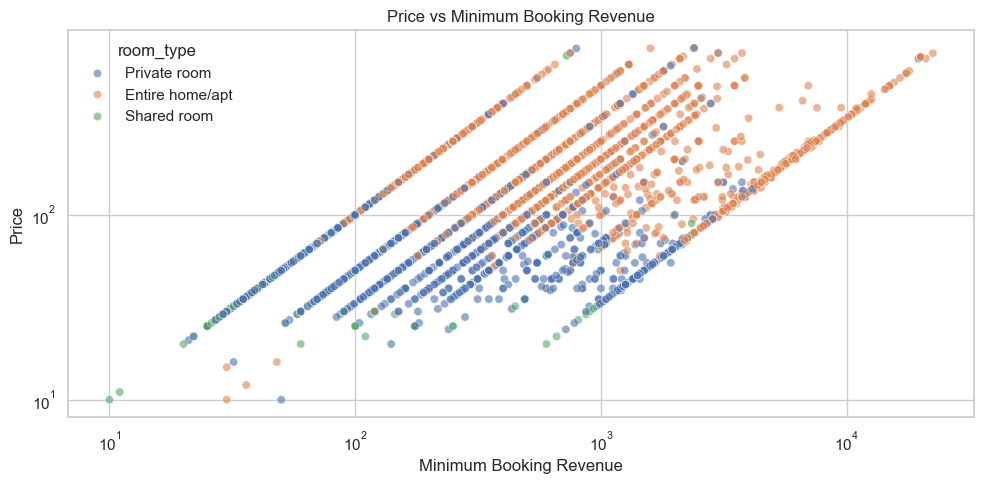

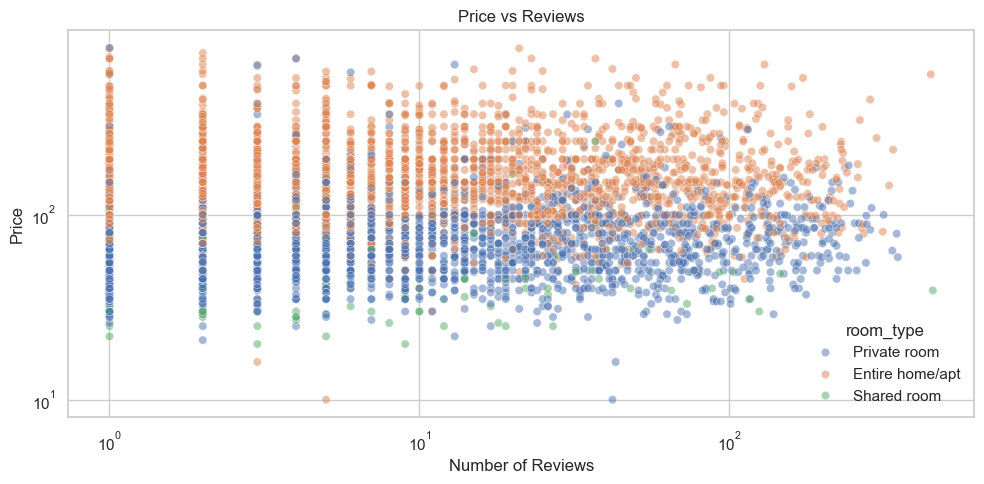

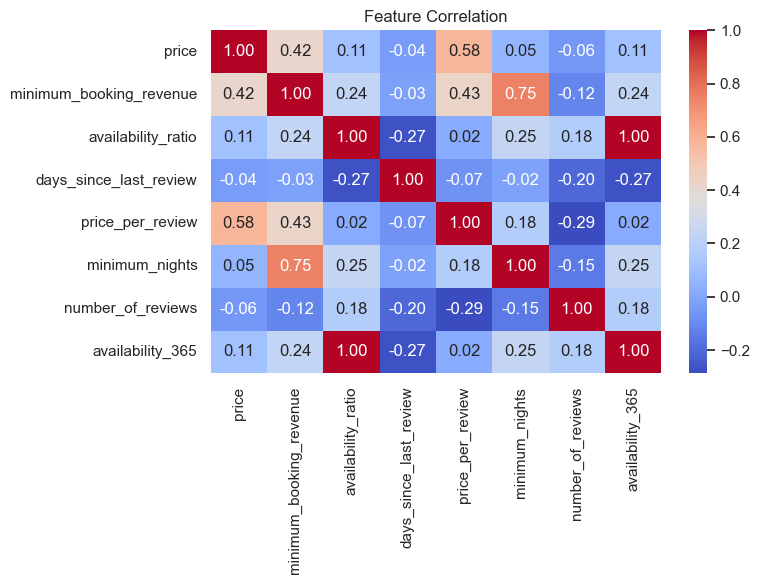

In [8]:
sampled = df.sample(n=6000, random_state=0) if len(df) > 6000 else df
plt.figure(figsize=(10,5))
sns.scatterplot(data=sampled, x="minimum_booking_revenue", y="price", hue="room_type", alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Minimum Booking Revenue")
plt.ylabel("Price")
plt.title("Price vs Minimum Booking Revenue")
plt.tight_layout()
plt.figure(figsize=(10,5))
sns.scatterplot(data=sampled, x="number_of_reviews", y="price", hue="room_type", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Price vs Reviews")
plt.tight_layout()
corr_cols = ["price","minimum_booking_revenue","availability_ratio","days_since_last_review","price_per_review","minimum_nights","number_of_reviews","availability_365"]
corr = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.tight_layout()

## Distribution

/tmp/ipykernel_191595/3566611092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="neighbourhood_group", y="price", palette="flare")


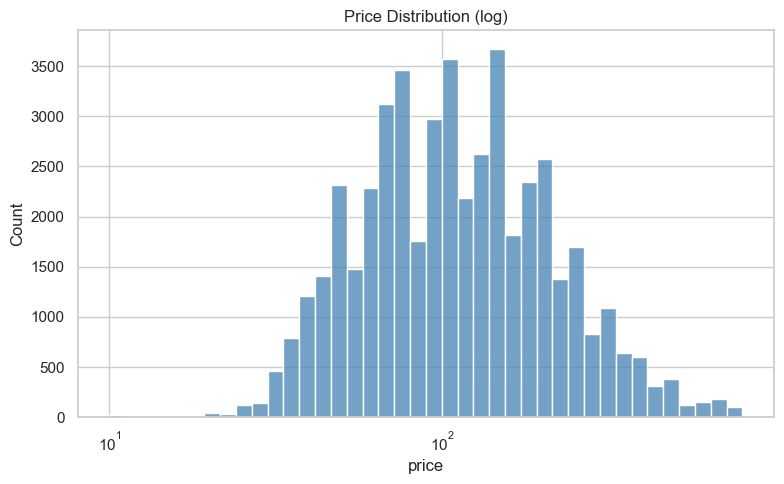

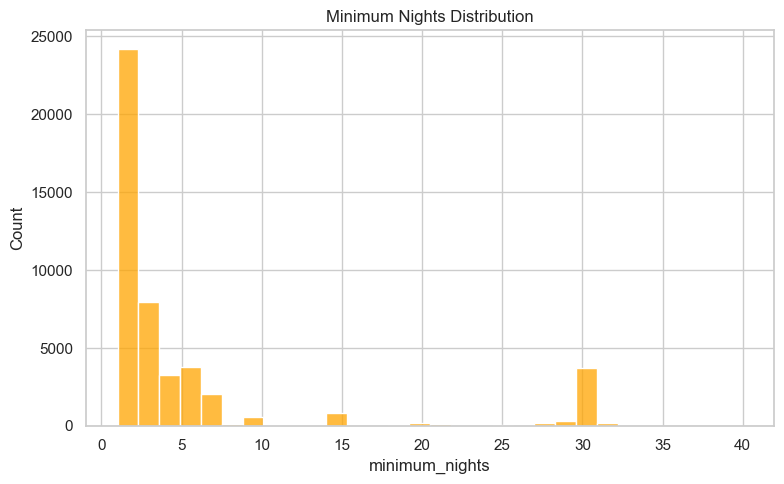

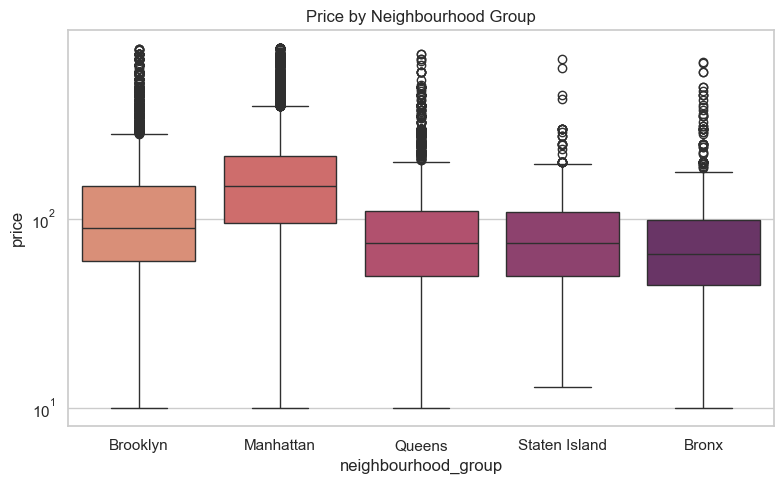

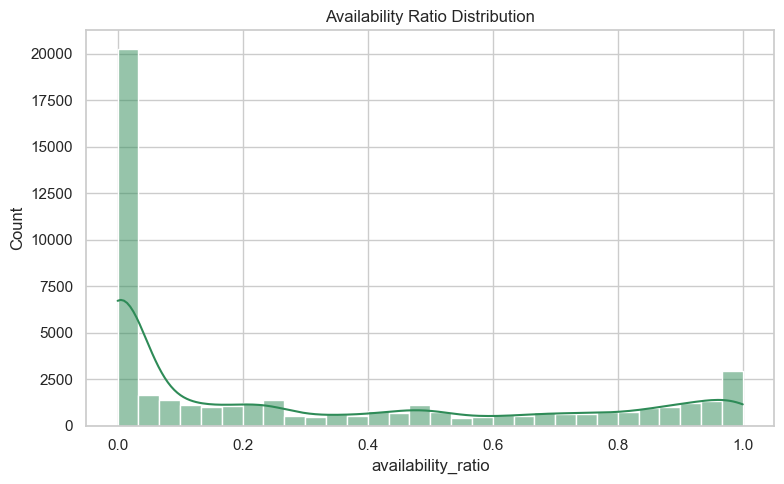

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=40, log_scale=True, color="steelblue")
plt.title("Price Distribution (log)")
plt.tight_layout()
plt.figure(figsize=(8,5))
sns.histplot(df["minimum_nights"], bins=30, color="orange")
plt.title("Minimum Nights Distribution")
plt.tight_layout()
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="neighbourhood_group", y="price", palette="flare")
plt.yscale("log")
plt.title("Price by Neighbourhood Group")
plt.tight_layout()
plt.figure(figsize=(8,5))
sns.histplot(df["availability_ratio"], bins=30, kde=True, color="seagreen")
plt.title("Availability Ratio Distribution")
plt.tight_layout()

## Insights

/tmp/ipykernel_191595/3216654282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_price.values, y=group_price.index, palette="crest")


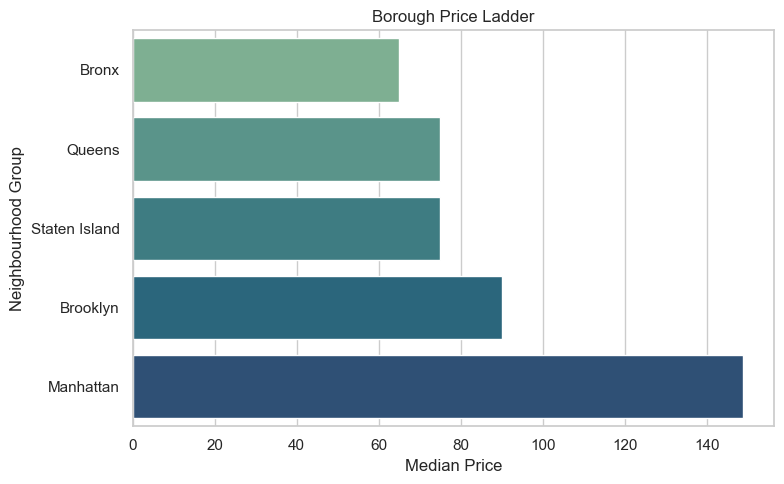

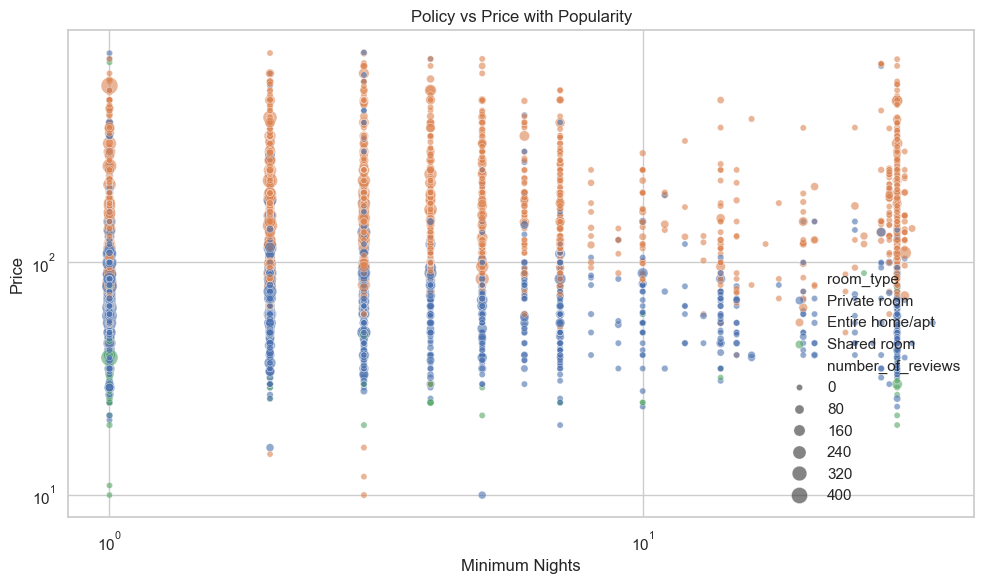

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=group_price.values, y=group_price.index, palette="crest")
plt.title("Borough Price Ladder")
plt.xlabel("Median Price")
plt.ylabel("Neighbourhood Group")
plt.tight_layout()
plt.figure(figsize=(10,6))
sns.scatterplot(data=sampled, x="minimum_nights", y="price", hue="room_type", size="number_of_reviews", sizes=(20,150), alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.title("Policy vs Price with Popularity")
plt.tight_layout()